# Import libraries and read data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing

In [2]:
# data = pd.read_csv("a1_b1_c1.csv")
data = pd.read_csv("a1_b1_c2.csv")
# data = pd.read_csv("a1_b2_c1.csv")
# data = pd.read_csv("a1_b2_c2.csv")

# Train test split

In [3]:
# fix random seed for reproducibility
np.random.seed(7)

# split into input (X) and output (Y) variables
X = data.iloc[:,data.columns != 'isFraud']
Y = data['isFraud']
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

#scaling to around -2 to 2 (Z)
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Prediction using Gradient Boosting 

Train Accuracy score: 1.00000
Train ROC score: 1.00000
Test Accuracy score: 0.98750
Test ROC score: 0.97863


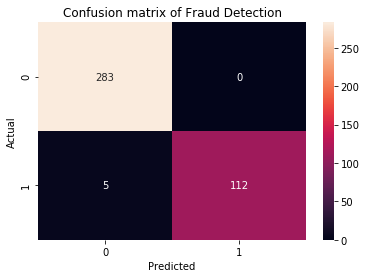

Stored 'confuse_gb' (ndarray)


In [4]:
clf = GradientBoostingClassifier(learning_rate=0.05, max_depth=1, n_estimators=500, random_state=1)
clf.fit(scaled_X_train, y_train)

# Predict train set
y_pred_train = clf.predict(scaled_X_train)
acc_train = accuracy_score(y_train, y_pred_train)
roc_train = roc_auc_score(y_train, y_pred_train)
print('Train Accuracy score: {0:0.5f}' .format(acc_train))
print('Train ROC score: {0:0.5f}' .format(roc_train))

# Predict test set
y_pred_test = clf.predict(scaled_X_test)
acc_test = accuracy_score(y_test, y_pred_test)
roc_test = roc_auc_score(y_test, y_pred_test)
print('Test Accuracy score: {0:0.5f}' .format(acc_test))
print('Test ROC score: {0:0.5f}' .format(roc_test))

# Plot confusion matrix for test
confuse_gb = confusion_matrix(y_test, y_pred_test)
confuse_gb
fig = plt.figure()
sns.heatmap(confuse_gb, annot = True, fmt='d')
plt.title("Confusion matrix of Fraud Detection")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# store best results for gradient boosting
%store confuse_gb

# GridsearchCV

In [ ]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

clf = GradientBoostingClassifier() 

# Define hyperparameters and grid search
param_grid = { 
    'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.175],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1,2]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=10)
grid_search.fit(scaled_X_train, y_train)
grid_search.best_params_

CPU times: user 48.6 s, sys: 14.6 ms, total: 48.6 s
Wall time: 48.7 s


In [ ]:
# Get best score
grid_search.best_score_

0.9800000000000001

In [ ]:
# Get best parameters
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 400}

In [ ]:
# Store search results in df
df = pd.DataFrame(grid_search.cv_results_)
df.sort_values(by=['rank_test_score'], inplace=True)
df.head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
40,0.033322,0.000620,0.000690,0.000023,0.175,1,100,"{'learning_rate': 0.175, 'max_depth': 1, 'n_es...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.040000,1
21,0.065661,0.001905,0.000785,0.000093,0.125,1,200,"{'learning_rate': 0.125, 'max_depth': 1, 'n_es...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.040000,1
3,0.131825,0.005663,0.000835,0.000029,0.05,1,400,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.040000,1
4,0.162281,0.003178,0.000889,0.000033,0.05,1,500,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.040000,1
30,0.033636,0.001680,0.000707,0.000021,0.15,1,100,"{'learning_rate': 0.15, 'max_depth': 1, 'n_est...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.040000,1
11,0.069187,0.002026,0.000757,0.000024,0.1,1,200,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.040000,1
19,0.144514,0.003712,0.000864,0.000018,0.1,2,500,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,1.0,0.97,0.064031,7
18,0.123705,0.004361,0.000847,0.000038,0.1,2,400,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,1.0,0.97,0.064031,7
17,0.096639,0.004223,0.000790,0.000029,0.1,2,300,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,1.0,0.97,0.064031,7
16,0.071594,0.002765,0.000742,0.000023,0.1,2,200,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,1.0,0.97,0.064031,7


In [ ]:
# store search results in csv
df.to_csv('GB_cv_result_3.csv')